# Code for "A note on data splitting with e-values"

## Sections 3 and 4: experiments with p-values and e-values

Let us take $r:=100$ and $\sigma_0:=1$; we then have $\mu=\Delta/10$.

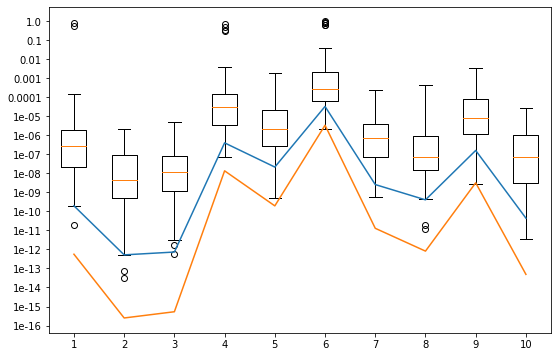

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# parameters that I vary:
m = 10
p = 0.4
Delta = 6

np.random.seed(1)

# fixed and computed values of parameters
r = 100  # 5 is a bad value since in this case there are only 10 possible data splits of each sample
   # default value: 100 (in any case, r should be divisible by 5)
mu = Delta/np.sqrt(r)
first_portion = int(p*r)

n_boxplots = 10    # the number of boxplots in my picture (10)
n_data_splits = 100 # number of data splits to try for each boxplot (100)
p_values = np.zeros((n_data_splits,n_boxplots))  # initializing the data-split p-values to plot
exact_p_values = np.zeros(n_boxplots)  # initializing the exact p-values to plot as blue line
e_values = np.zeros((n_data_splits,n_boxplots))  # initializing the data-split e-values to average
mean_e_values = np.zeros(n_boxplots)  # initializing the average e-values

for boxplot in range(n_boxplots):
  # initializing the data:
  data = np.random.normal(size=(m,r))
  # generating the data:
  data[0,] = data[0,] + mu
  # now compute the information for the current boxplot
  for data_split in range(n_data_splits):
    # permute the data:
    for m_index in range(m):
      data[m_index,] = np.random.permutation(data[m_index,])
    # find the largest mean of the first portion:
    record = -np.inf
    for m_index in range(m):
      current = np.mean(data[m_index,:first_portion])
      if current>record:
        largest = m_index
        record = current
    a = record  # my notation for the largest mean of the first portion
    b = np.mean(data[largest,first_portion:])  # my notation for the mean of the second portion
    # find the corresponding p-value:
    sigma = 1/np.sqrt((1-p)*r)  # the standard deviation of the second portion
    p_values[data_split,boxplot] = norm.sf(b/sigma)
    # find the corresponding e-value:
    e_values[data_split,boxplot] = np.exp(a*b/(sigma**2) - a**2/(2*sigma**2))
  # Now let us perform the exact test for this box plot
  # first we find the largest sample mean
  record = -np.inf
  for m_index in range(m):
    current = np.mean(data[m_index,])
    if current>record:
      record = current
  exact_p_values[boxplot] = 1 - (1-norm.sf(np.sqrt(r)*record))**m
  # Finally, the average e-value:
  mean_e_values[boxplot] = np.mean(e_values[:,boxplot])

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

# Log scale:
# Create the boxplot for the data-split p-values
ax.boxplot(np.log10(p_values))
ax.set_yticks(np.arange(-20,1))
ax.set_yticklabels(10.0**np.arange(-20,1))
# Plot the exact p-values and average e-values:
plt.plot(np.arange(1,n_boxplots+1),np.log10(exact_p_values))
plt.plot(np.arange(1,n_boxplots+1),-2*np.log10(mean_e_values+1))

# Save the figure
fig.savefig('figure.jpg', bbox_inches='tight')

Now let us draw an e-value-based figure.
It only uses exact p-values and data-split e-values.

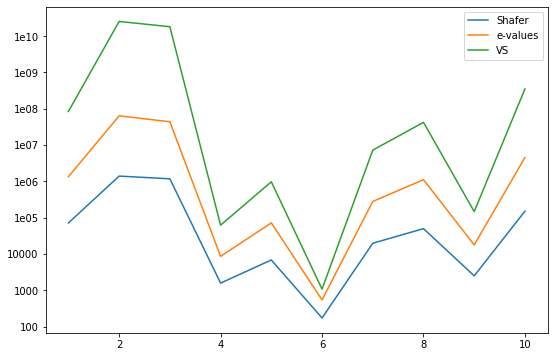

In [2]:
# Shafer's calibrator:
def Shafer(p):
  return 1/np.sqrt(p)-1

# VS bound:
def VS(p):
  if p<=np.exp(1):
    return -np.exp(-1)/(p*np.log(p))
  else:
    return 1

# VS-transform the p-values:
VS_e_values = np.zeros(n_boxplots)
for boxplot in range(n_boxplots):
  VS_e_values[boxplot] = VS(exact_p_values[boxplot])
  
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

# Log scale:
ax.set_yticks(np.arange(12))
# ax.set_yticklabels(10.0**np.arange(12))
ax.set_yticklabels(['1','10','100','1000','10000','1e05','1e06','1e07','1e08','1e09','1e10','1e11'])
# Plot the exact p-values (Shafer-transformed):
plt.plot(np.arange(1,n_boxplots+1),np.log10(Shafer(exact_p_values)),label="Shafer")
# Plot the e-values:
plt.plot(np.arange(1,n_boxplots+1),np.log10(mean_e_values),label="e-values")
# Plot the exact p-values (VS-transformed):
plt.plot(np.arange(1,n_boxplots+1),np.log10(VS_e_values),label="VS")
ax.legend()

# Save the figure
fig.savefig('figure.jpg', bbox_inches='tight')

## Appendix

Let's draw the distribution function of exact p-values.

0.6703
0.2965


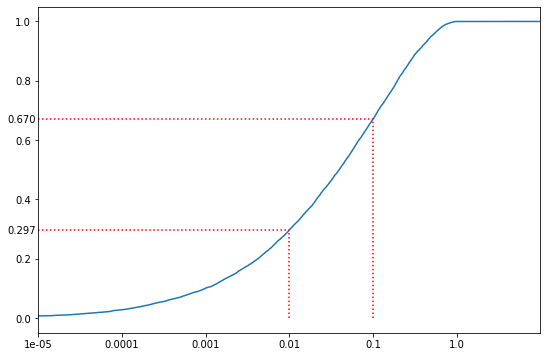

In [3]:
# This is modelled on the first cell above.
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# parameters that I vary:
m = 2
Delta = 2

np.random.seed(1)

# fixed and computed values of parameters
r = 5  # 5 is a good value here (in any case, r should be divisible by 5)
mu = Delta/np.sqrt(r)

n_p_values = 10000    # the number of p-values in my picture (10000)
p_values = np.zeros(n_p_values)  # initializing the exact p-values to plot

for i in range(n_p_values):
  # initializing the data:
  data = np.random.normal(size=(m,r))
  # generating the data:
  data[0,] = data[0,] + mu
  # Now we perform the exact test for this dataset
  # first we find the largest sample mean
  record = -np.inf
  for m_index in range(m):
    current = np.mean(data[m_index,])
    if current>record:
      record = current
  p_values[i] = 1 - (1-norm.sf(np.sqrt(r)*record))**m

# sorting p-values
p_values = np.sort(p_values)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

# Log scale:
# Create the boxplot for the data-split p-values
ax.set_xticks(np.arange(-20,1))
ax.set_xticklabels(10.0**np.arange(-20,1))
# Plot the distribution function of p-values:
plt.plot(np.append(np.log10(p_values),1),np.arange(n_p_values+1)/n_p_values)
plt.xlim(-5,1)

# The lines for Cox's $\alpha=0.1$ and $\alpha=0.01$:
# find alpha = 0.1
alphas = [0.1,0.01]
powers = ["0.670","0.297"]
for i in range(2):
  alpha = alphas[i]
  power = powers[i]
  index = 0
  for i in range(n_p_values):
    if p_values[i] <= alpha:
      index = i
  print(index/n_p_values)
  # vertical lines:
  plt.plot([np.log10(alpha),np.log10(alpha)],[0,index/n_p_values],color="r",ls=":")
  # horizontal lines:
  plt.plot([-5,np.log10(alpha)],[index/n_p_values,index/n_p_values],color="r",ls=":")
  # text:
  plt.text(-5.37,index/n_p_values-0.01,power)

# Save the figure
fig.savefig('figure.jpg', bbox_inches='tight')